<a href="https://colab.research.google.com/github/vaishnavi160/Sparks-Internship/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## by Vaishnavi Deshmukh. 9/11/2021

# **Sparks Foundation** 
### Data Science and Business Analytics Internship
### **Task1- Prediction using Supervised learning**

#### **Problem Statment**- Predict the percentage of a student based on no. of hours of study.

###**Importing Libraries**

In [ ]:
import pandas as pd  
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


### **Importing Dataset**

In [ ]:
data = pd.read_csv("http://bit.ly/w-data") 
print("Successfully imported the data" )

Successfully imported the data


In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **Data Wrangling**

**Getting introduced to dataset-**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Descriptive analysis-**

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Checking the null values**

In [ ]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
data.shape

(25, 2)

### **Data Visualization**

**Visualizing the data using scatter plot . </br> 
Finding if there is any relation between No. of hours study and Scores.**



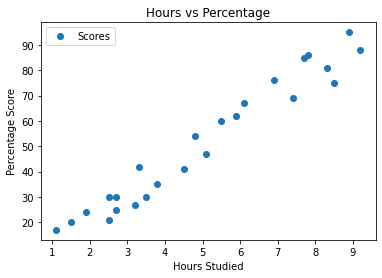

In [ ]:
data.plot(x='Hours', y='Scores' , style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

#### **This graph shows a positive linear relationship between no. of Hours of study and scores gained by the student.**

## **Building the model**

### **Preparing the data**

**We will divide the data into "attributes" and "labels" .**

In [ ]:
X = data.iloc[:, :-1].values # Hours of study
y = data.iloc[:, 1].values   # scores

**Dividing the dataset into two sets. Traning set and Test set.** </br>
Scikit-Learn's built-in train_test_split()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [ ]:
X_train.shape

(20, 1)

In [ ]:
X_test.shape

(5, 1)

### **Training the Algorithm**

In [ ]:
regg = LinearRegression()  
regg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### **Training Dataset**

**Simple Linear Regression**

In [ ]:
line1=regg.coef_*X_train+regg.intercept_

**Scatter plot for Training dataset**

Text(0.5, 1.0, 'TRAINING DATASET')

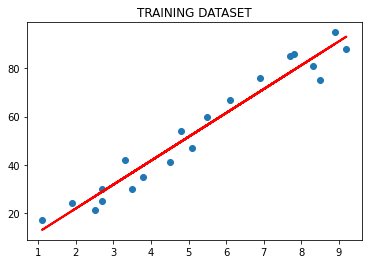

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,line1,color='red',linewidth=2)
plt.title('TRAINING DATASET')

### **Testing Dataset**

In [ ]:
line2=regg.coef_*X_test+regg.intercept_


**Scatter plot for Testing dataset**

Text(0.5, 1.0, 'TESTING DATASET')

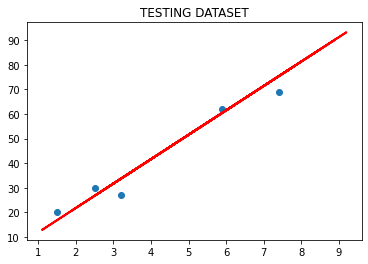

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_train,line1,color='red',linewidth=2)
plt.title('TESTING DATASET')

In [ ]:
y_predict=regg.predict(X_test)
y_predict


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
predict 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Evaluation of Model**

**Mean Absoulte Error**

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predict)) 

Mean Absolute Error: 4.183859899002982


**Maximum Error**

In [ ]:
from sklearn.metrics import max_error
max_error(y_test, y_predict)
print('Max Error:',max_error(y_test, y_predict)) 


Max Error: 6.732260779489835


**Root Mean Square Error**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_predict))
print('Root mean square error:',rms)

Root mean square error: 4.647447612100373


### **Prediction using Model**

**Predicting the score obtained by student who studies for 9.25 hours**

In [ ]:
data_predict=regg.predict([[9.25]])
data_predict

array([93.69173249])